In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

We will be solving the 1D advection equation using non-interpolating semi-lagrange techniques with a Square initial distribution.



In [20]:
# Parameters
dt = 1
v = 1.23 # advection speed

In [21]:
x_coordinates = np.array([x for x in range(-50, 51)])
initial_distribution = np.exp(-((x_coordinates)/10)**2)
first_step_distribution = np.exp(-((x_coordinates - (v*dt))/10)**2)

# plt.plot(x_coordinates, initial_distribution)
# plt.show()

In [22]:
grid = np.zeros((1000, len(x_coordinates))) # rows are time steps, columns are x coordinates
grid[0, :] = initial_distribution
grid[1, :] = first_step_distribution

In [26]:
# velocity interpolator
def velocity_interp(timestep, shift): # TO DO LATER
    vel_mat = np.zeros((1, len(x_coordinates)))
    vel_mat += v
    return np.roll(vel_mat, int(shift))

# finite difference differentiator 
def shifted_diff(timestep, shift):
    if shift.is_integer():
        diff_mat = (np.roll(grid[timestep, :], int(shift - 1)) - np.roll(grid[timestep, :], int(shift + 1)))/2
    else:
        diff_mat = (np.roll(grid[timestep, :], int(shift - 0.5)) - np.roll(grid[timestep, :], int(shift + 0.5)))
    return diff_mat

# Fourier space differentiator
def shifted_diff_fourier(timestep, shift):
    # Fourier transform of the grid at the given timestep
    grid_fft = np.fft.fft(grid[timestep, :])
    
    # Generate a frequency array
    N = len(grid[timestep, :])
    k = np.fft.fftfreq(N, d=1)  # Assuming unit spacing
    
    # Apply the derivative in Fourier space (i*k shifts the phase)
    derivative_fft = 1j * 2 * np.pi * k * grid_fft
    
    # Inverse Fourier transform to get back to spatial domain
    diff_mat = np.fft.ifft(derivative_fft).real
    
    # Shift the result as needed
    if shift.is_integer():
        diff_mat = np.roll(diff_mat, int(shift))
    else:
        diff_mat = 0.5*np.roll(diff_mat, int(shift - 0.5)) + 0.5*np.roll(diff_mat, int(shift + 0.5))
    
    return diff_mat

# starting point
def starting_point(velocity):
    return int(round(2*velocity))

# Noninterpolating Semi-Lagrangian, gives us the value of x at the starting point for the next timestep
def semi_lagrange_noninterp(timestep, grid_array, p):
    shifted_t_1_array = np.roll(grid_array[timestep - 1, :], p)
    grid_array[timestep + 1, :] = shifted_t_1_array + 2*(p/2 - velocity_interp(timestep, p/2))*shifted_diff(timestep, p/2)


In [27]:
p = starting_point(v)
for t in range(1, len(grid) - 1):
    semi_lagrange_noninterp(t, grid, p)
# plt.imshow(grid, aspect='auto', cmap='viridis')
# plt.show()

# Velocity Test

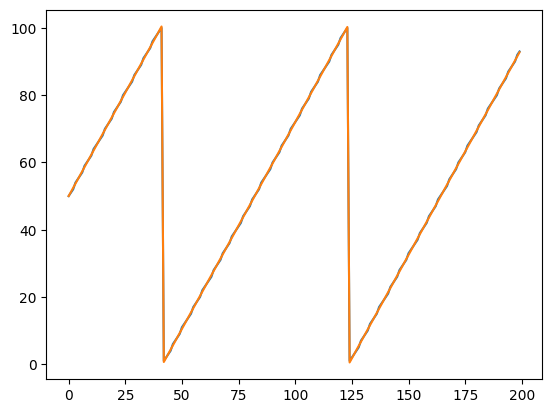

In [18]:
time = np.array([t for t in range(len(grid))])
plt.plot(time, np.argmax(grid, axis=1))
plt.plot(time, (50 + v*time)%101)
plt.show()

In [11]:
print(np.argmax(grid, axis = 1))

[ 50  51  52  53  54  55  56  57  58  60  60  62  62  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  89  89  91  91  93  94  95  96  97  98  99 100   0   1   2   3   4
   5   6   7   8   9  10  11  12  13  14  15  17  17  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100   0   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  24  25  26  27  29  29  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54]


In [12]:
sim_wave_vel = (np.argmax(grid, axis = 1)[-1] + 101*2 - 50)/(len(grid) - 1)
print(sim_wave_vel)

1.035175879396985


In [28]:
from video_creator_1d import create_video
create_video(grid, '1D_finite_diff_gaussian_constvel_advection_noninterp_SL.mp4')